In [35]:
import os
import re
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceBgeEmbeddings

In [36]:
model_name = "intfloat/e5-small-v2"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": True, "batch_size": 32}

emb = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

vectorstore = FAISS.load_local("faiss_index_proyectos_10_txt", embeddings=emb, 
                               allow_dangerous_deserialization=True)

documents = list(vectorstore.docstore._dict.values())
embeddings = vectorstore.index.reconstruct_n(0, vectorstore.index.ntotal)
metadata = [doc.metadata for doc in documents]

In [37]:
csv_path = r"C:\Users\emolt\OneDrive - UMH\MASTER\TFM\BASE\cordis_data_processed.csv"
df = pd.read_csv(csv_path, encoding="utf-8")

In [38]:
start = time.time()

reducer_PCA = PCA(n_components=2)
reduced_PCA = reducer_PCA.fit_transform(embeddings)

end = time.time()
print(f"PCA ejecutado en {end - start:.2f} segundos")

PCA ejecutado en 0.80 segundos


Temática del proyecto (topic).

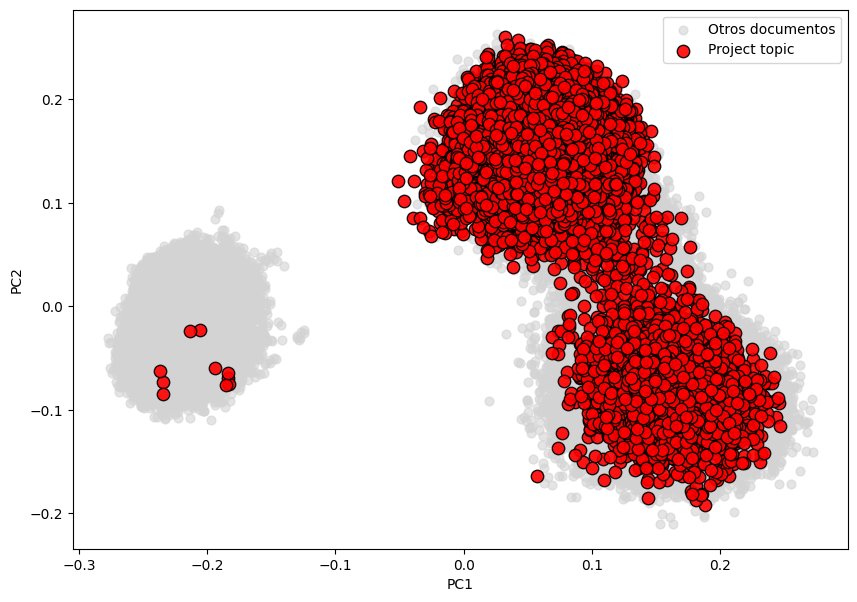

In [40]:
mask_cost = [
    "topic" in doc.page_content.lower()
    for doc in documents
]

plt.figure(figsize=(10, 7))

plt.scatter(
    reduced_PCA[~np.array(mask_cost), 0],
    reduced_PCA[~np.array(mask_cost), 1],
    c="lightgray",
    alpha=0.6,
    s=40,
    label="Otros documentos",
    zorder=1
)

plt.scatter(
    reduced_PCA[np.array(mask_cost), 0],
    reduced_PCA[np.array(mask_cost), 1],
    c="red",
    edgecolor="black",  
    alpha=0.9,
    s=80,              
    label="Project topic",
    zorder=2
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Coste del proyecto (project total cost).

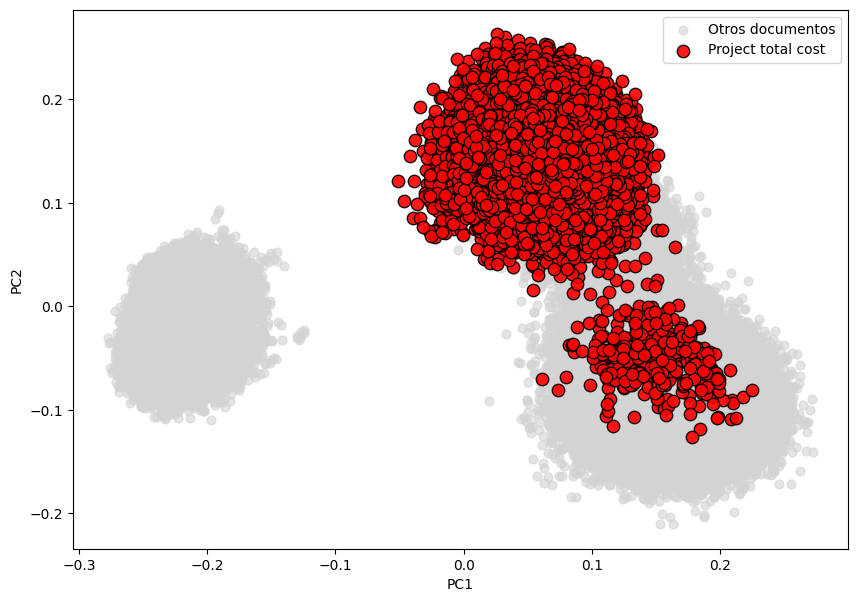

In [41]:
mask_cost = [
    "total cost" in doc.page_content.lower()
    for doc in documents
]

plt.figure(figsize=(10, 7))

plt.scatter(
    reduced_PCA[~np.array(mask_cost), 0],
    reduced_PCA[~np.array(mask_cost), 1],
    c="lightgray",
    alpha=0.6,
    s=40,
    label="Otros documentos",
    zorder=1
)

plt.scatter(
    reduced_PCA[np.array(mask_cost), 0],
    reduced_PCA[np.array(mask_cost), 1],
    c="red",
    edgecolor="black",  
    alpha=0.9,
    s=80,              
    label="Project total cost",
    zorder=2
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Coste de participación de la organización
(organisation total participation cost).

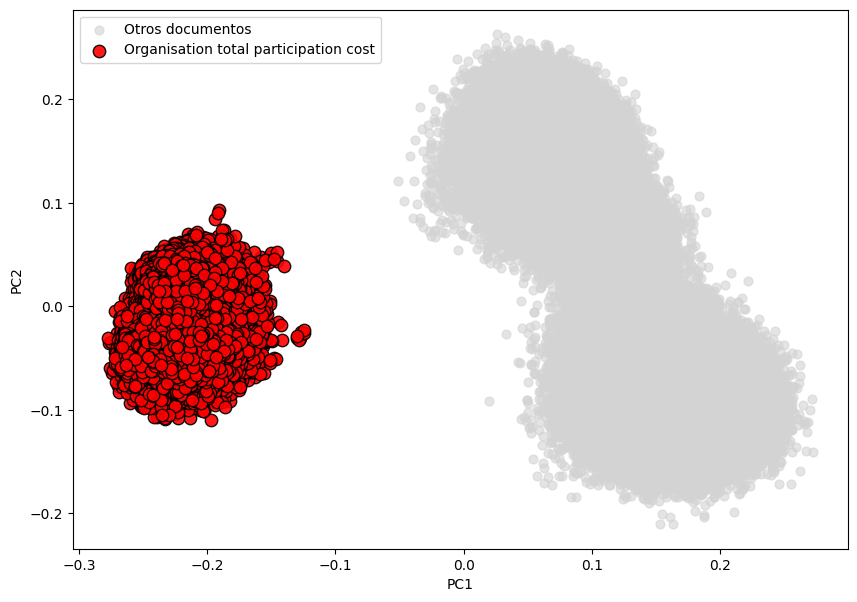

In [42]:
mask_cost = [
    "participation cost" in doc.page_content.lower()
    for doc in documents
]

plt.figure(figsize=(10, 7))

plt.scatter(
    reduced_PCA[~np.array(mask_cost), 0],
    reduced_PCA[~np.array(mask_cost), 1],
    c="lightgray",
    alpha=0.6,
    s=40,
    label="Otros documentos",
    zorder=1
)

plt.scatter(
    reduced_PCA[np.array(mask_cost), 0],
    reduced_PCA[np.array(mask_cost), 1],
    c="red",
    edgecolor="black", 
    alpha=0.9,
    s=80,             
    label="Organisation total participation cost",
    zorder=2
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Rol de la organización (organisation role).

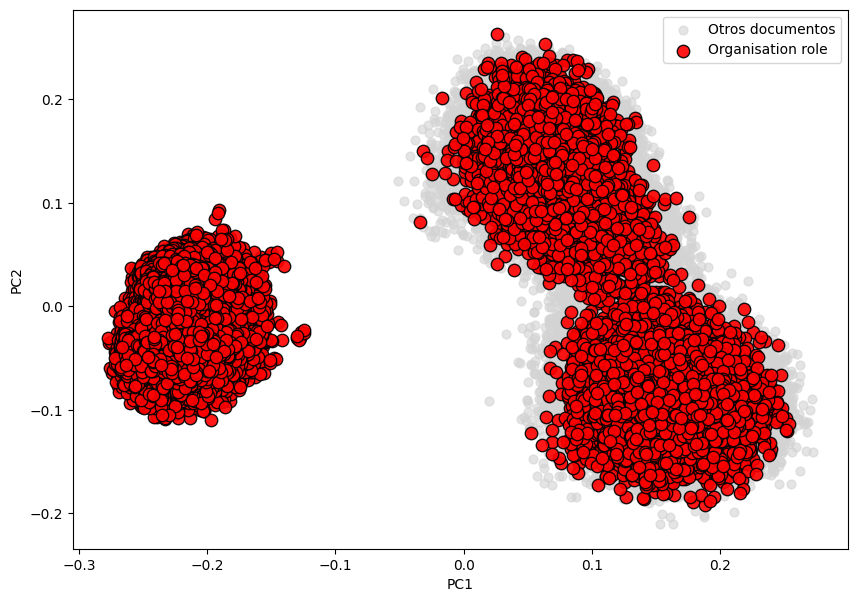

In [43]:
mask_cost = [
    "role" in doc.page_content.lower()
    for doc in documents
]

plt.figure(figsize=(10, 7))

plt.scatter(
    reduced_PCA[~np.array(mask_cost), 0],
    reduced_PCA[~np.array(mask_cost), 1],
    c="lightgray",
    alpha=0.6,
    s=40,
    label="Otros documentos",
    zorder=1
)

plt.scatter(
    reduced_PCA[np.array(mask_cost), 0],
    reduced_PCA[np.array(mask_cost), 1],
    c="red",
    edgecolor="black",
    alpha=0.9,
    s=80,              
    label="Organisation role",
    zorder=2
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Materiales avanzados vs IA

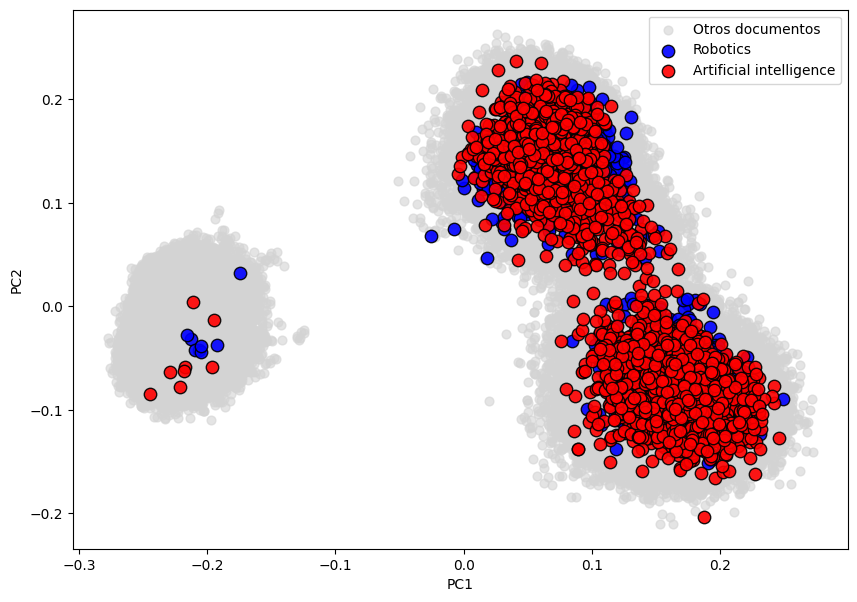

In [44]:
mask_adv = [
    "advanced materials" in doc.page_content.lower()
    for doc in documents
]

mask_ai = [
    "artificial intelligence" in doc.page_content.lower()
    for doc in documents
]

plt.figure(figsize=(10, 7))

mask_otros = ~np.array(mask_adv) & ~np.array(mask_ai)

plt.scatter(
    reduced_PCA[mask_otros, 0],
    reduced_PCA[mask_otros, 1],
    c="lightgray",
    alpha=0.6,
    s=40,
    label="Otros documentos",
    zorder=1
)

plt.scatter(
    reduced_PCA[np.array(mask_adv), 0],
    reduced_PCA[np.array(mask_adv), 1],
    c="blue",
    edgecolor="black",
    alpha=0.9,
    s=80,
    label="Robotics",
    zorder=2
)

plt.scatter(
    reduced_PCA[np.array(mask_ai), 0],
    reduced_PCA[np.array(mask_ai), 1],
    c="red",
    edgecolor="black",
    alpha=0.9,
    s=80,
    label="Artificial intelligence",
    zorder=3
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Robotica vs IA

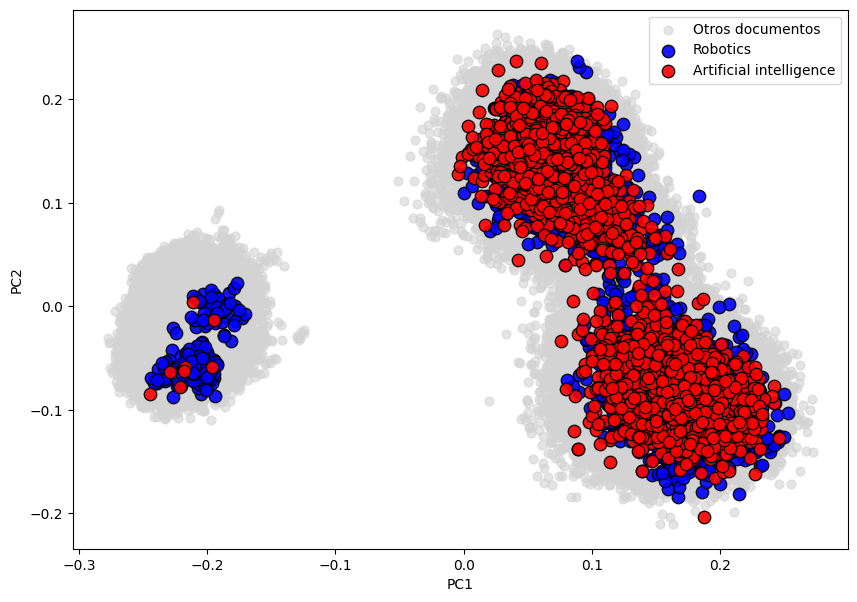

In [45]:
mask_adv = [
    "robotic" in doc.page_content.lower()
    for doc in documents
]

mask_ai = [
    "artificial intelligence" in doc.page_content.lower()
    for doc in documents
]

plt.figure(figsize=(10, 7))

mask_otros = ~np.array(mask_adv) & ~np.array(mask_ai)

plt.scatter(
    reduced_PCA[mask_otros, 0],
    reduced_PCA[mask_otros, 1],
    c="lightgray",
    alpha=0.6,
    s=40,
    label="Otros documentos",
    zorder=1
)

plt.scatter(
    reduced_PCA[np.array(mask_adv), 0],
    reduced_PCA[np.array(mask_adv), 1],
    c="blue",
    edgecolor="black",
    alpha=0.9,
    s=80,
    label="Robotics",
    zorder=2
)

plt.scatter(
    reduced_PCA[np.array(mask_ai), 0],
    reduced_PCA[np.array(mask_ai), 1],
    c="red",
    edgecolor="black",
    alpha=0.9,
    s=80,
    label="Artificial intelligence",
    zorder=3
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()